In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
bnbair=pd.read_csv("airbnb.csv")

In [3]:
bnbair

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [4]:
bnbair.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
# 1. gambaran dari data airbnb adalah :
#    a. data airbnb terdiri dari 48895 row dan 16 kolom 
#    b. terdapat dua kolom yang bertipe integer, enam kolom bertipe object (string) dan delapan kolom yang bertipe float
#    c. data airbnb berisi dataframe tentang harga (price) tempat penginapan, tipe kamar atau homestay, tingkat kemahalan harga penginapan

In [6]:
# 2. Tunjukkan properties dari data pada setiap kolom, seperti type, missing value, dan lain-lain.
bnbair.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [7]:
# properties selanjutnya adalah jumlah baris dan kolom
bnbair.shape

(48895, 16)

In [8]:
# properties selanjutnya adalah data unique masing - masing kolom
bnbair.value_counts()

id        name                                             host_id    host_name   neighbourhood_group  neighbourhood     latitude  longitude  room_type        price  minimum_nights  number_of_reviews  last_review  reviews_per_month  calculated_host_listings_count  availability_365
36455809  Cozy Private Room in Bushwick, Brooklyn          74162901   Christine   Brooklyn             Bushwick          40.69805  -73.92801  Private room     30     1               1                  2019-07-08   1.00               1                               1                   1
12542485  2 BDRM Apt. in the Middle of NYC apt. 3B         17770287   Nina        Manhattan            Murray Hill       40.74930  -73.98132  Entire home/apt  180    30              5                  2019-03-09   0.14               14                              210                 1
12537221  Great Location                                   67884746   Linda       Brooklyn             Prospect Heights  40.67947  -73.96466  Pr

In [9]:
# Properties Missing value
bnbair.isna()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48891,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48892,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48893,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


In [10]:
# penjelasan data diatas yaitu bahwa ketika terdapat True maka data tersebut adalah missing value, sedangkan False adalah defaultnya 
# agar mudah dipahami tentang missing value dari data diatas maka dilakukan agregasi data menggunakan fungsi sum() seperti berikut ini :

bnbair.isna().sum()


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
# berdasarkan yang ditunjukkan diatas dapat diketahui bahwa kolom yang memiliki missing value adalah :
# 1. kolom 'name' 16 data missing value
# 2. kolom 'host_name' 21 data missing value
# 3. kolom 'last_review' 10052 data missing value
# 4. kolom 'review_per_month' 10052 data missing value

In [12]:
# 3. Tunjukkan jumlah data, mean, median, dan standar deviasi atau data statistik
bnbair.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [13]:
# 4. Berapa harga minimal dan maksimal?
# Harga Maksimum
bnbair.loc[bnbair['price'].idxmax()]

id                                                            7003697
name                              Furnished room in Astoria apartment
host_id                                                      20582832
host_name                                                    Kathrine
neighbourhood_group                                            Queens
neighbourhood                                                 Astoria
latitude                                                      40.7681
longitude                                                    -73.9165
room_type                                                Private room
price                                                           10000
minimum_nights                                                    100
number_of_reviews                                                   2
last_review                                                2016-02-13
reviews_per_month                                                0.04
calculated_host_list

In [14]:
# Harga Minimum

bnbair.loc[bnbair['price'].idxmin()]


id                                                                         18750597
name                              Huge Brooklyn Brownstone Living, Close to it all.
host_id                                                                     8993084
host_name                                                                  Kimberly
neighbourhood_group                                                        Brooklyn
neighbourhood                                                    Bedford-Stuyvesant
latitude                                                                    40.6902
longitude                                                                  -73.9543
room_type                                                              Private room
price                                                                             0
minimum_nights                                                                    4
number_of_reviews                                                           

In [15]:
# 5. Selesaikan masalah missing value dengan cara berikut:
# a. Drop kolom-kolom yang mengandung missing value yang tidak dalam diisi dengan nilai yang logis, seperti nama, host_id, dan lain-lain.
# drop kolom id dan host_name karena mengandung nilai yang tidak logis
bnbair1 = bnbair.drop(bnbair.columns[[0, 3]], axis=1)
bnbair1


,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,Affordable room in Bushwick/East Williamsburg,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,Sunny Studio at Historical Neighborhood,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,43rd St. Time Square-cozy single bed,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [16]:
# 5. b. Isi missing value pada kolom last_review dengan data yang paling sering muncul

bnbair1['last_review'] = bnbair1['last_review'].fillna(bnbair1['last_review'].mode()[0])
bnbair1

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2019-06-23,NaN,2,9
48891,Affordable room in Bushwick/East Williamsburg,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2019-06-23,NaN,2,36
48892,Sunny Studio at Historical Neighborhood,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2019-06-23,NaN,1,27
48893,43rd St. Time Square-cozy single bed,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2019-06-23,NaN,6,2


In [17]:
# 5. c. Mengisi missing value pada kolom reviews_per_month dengan nilai mean

bnbair1.loc[:, 'reviews_per_month'] = bnbair1.loc[:, 'reviews_per_month'].fillna(bnbair1.loc[:, 'reviews_per_month'].mean())
bnbair1

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,1.373221,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2019-06-23,1.373221,2,9
48891,Affordable room in Bushwick/East Williamsburg,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2019-06-23,1.373221,2,36
48892,Sunny Studio at Historical Neighborhood,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2019-06-23,1.373221,1,27
48893,43rd St. Time Square-cozy single bed,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2019-06-23,1.373221,6,2


In [18]:
# Missing Value setelah dihandling
bnbair1.isna().sum()

name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [19]:
# 6. Buat kategori berdasarkan Price: Cheap, Medium, dan Expensive

bnbair1['price_category'] = np.where(bnbair1['price'] < 150, 'cheap', np.where(bnbair1['price']<=500, 'Medium', 'Expensive'))

In [ ]:
bnbair1

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365,cheap
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355,Medium
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,1.373221,1,365,Medium
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194,cheap
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0,cheap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2019-06-23,1.373221,2,9,cheap
48891,Affordable room in Bushwick/East Williamsburg,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2019-06-23,1.373221,2,36,cheap
48892,Sunny Studio at Historical Neighborhood,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2019-06-23,1.373221,1,27,cheap
48893,43rd St. Time Square-cozy single bed,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2019-06-23,1.373221,6,2,cheap


In [20]:
bnbair1['price_category'].value_counts()

cheap        31910
Medium       15941
Expensive     1044
Name: price_category, dtype: int64

In [21]:
# 7. Filter semua data yang memiliki last_review di > 2019

bnbair2 = bnbair1.loc[(bnbair1['last_review'] >= '2019-01-01')]
bnbair2

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price_category
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355,Medium
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,1.373221,1,365,Medium
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194,cheap
5,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.590000,1,129,Medium
7,Large Furnished Room Near B'way,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.470000,1,220,cheap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2019-06-23,1.373221,2,9,cheap
48891,Affordable room in Bushwick/East Williamsburg,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2019-06-23,1.373221,2,36,cheap
48892,Sunny Studio at Historical Neighborhood,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2019-06-23,1.373221,1,27,cheap
48893,43rd St. Time Square-cozy single bed,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2019-06-23,1.373221,6,2,cheap


In [22]:
bnbair2['price_category'].value_counts()

cheap        22595
Medium       11829
Expensive      837
Name: price_category, dtype: int64

## Visualisasi Harga Kamar

No handles with labels found to put in legend.


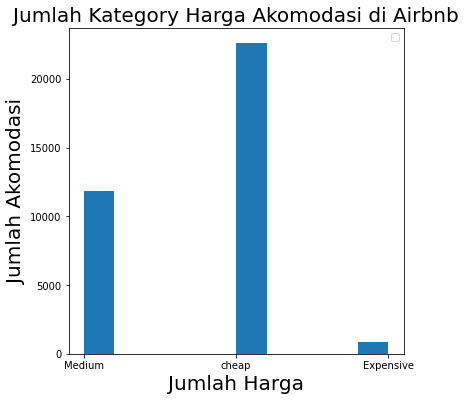

In [23]:
plt.figure(figsize=(6,6))
plt.hist(bnbair2['price_category'])
plt.title('Jumlah Kategory Harga Akomodasi di Airbnb', fontsize=20)
plt.ylabel('Jumlah Akomodasi', fontsize=20)
plt.xlabel('Jumlah Harga', fontsize=20)
plt.legend()
plt.show()


## Visualisasi Wilayah Akomodasi

No handles with labels found to put in legend.


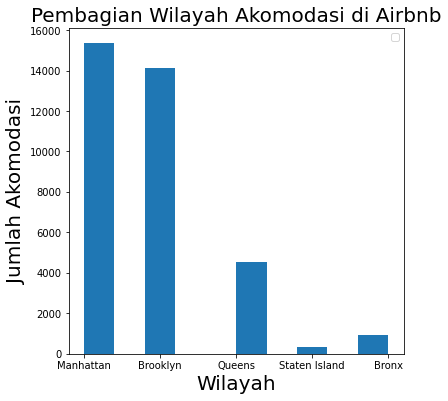

In [24]:
plt.figure(figsize=(6,6))
plt.hist(bnbair2['neighbourhood_group'])
plt.title('Pembagian Wilayah Akomodasi di Airbnb', fontsize=20)
plt.ylabel('Jumlah Akomodasi', fontsize=20)
plt.xlabel('Wilayah', fontsize=20)
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


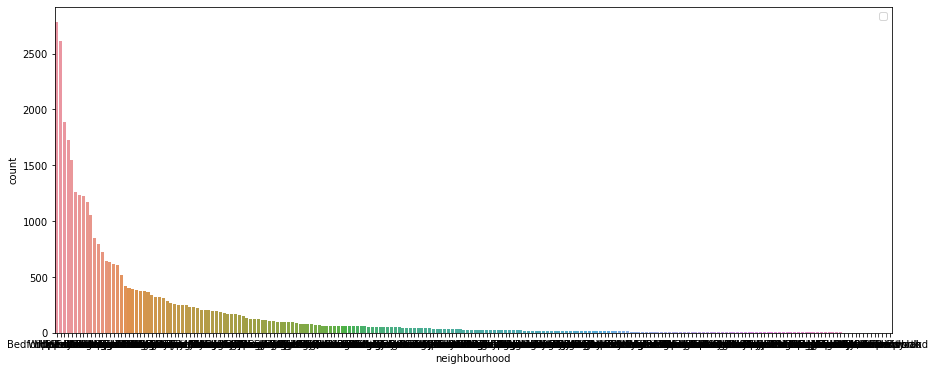

In [25]:
plt.figure(figsize=(15,6))
sns.countplot(bnbair2['neighbourhood'], order=bnbair2['neighbourhood'].value_counts().index)
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


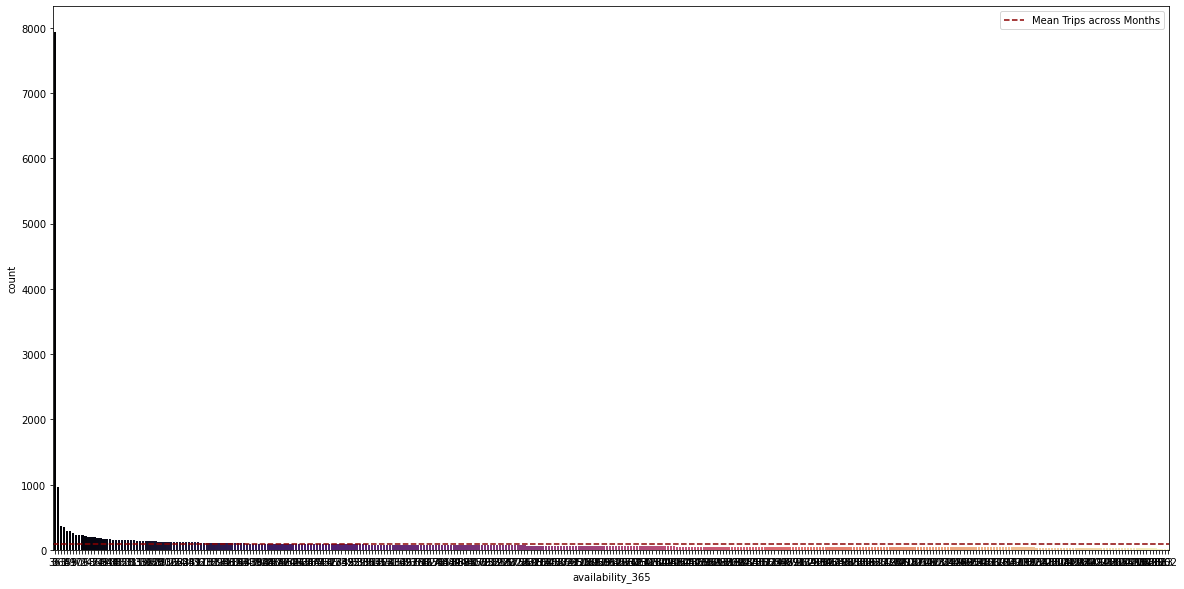

In [28]:
plt.figure(figsize=(20,10))
sns.countplot(bnbair2['availability_365'], order=bnbair2['availability_365'].value_counts().index, palette='magma')
plt.axhline(bnbair2['availability_365'].value_counts().mean(),linestyle='--', color = 'darkred', label='Mean Trips across Months')
plt.legend()
plt.show()